# Probability and Pseudorandom Numbers

Before we make our way into sampling distributions, let introduce some terminology, which may be useful when talking to statisticians.

* Basics of Probability
* Pseudorandom Numbers
* Some standard 1D distributions

## Basics of Probability and Distributions

Let us consider the following topics

* Population and Samples
* Random Variable
* PDF and CDF

for context, before moving on to study the generation of pseudorandom numbers

### Population and Sample

**Population**: It is the set of all entities that are the object of a statisticians interest
e.g: all American males, graduate students at FSU, all US voters

**Sample**: a *subset* of the population which are observed

Typically, the aim is to make inferences about the population from the sample. As you may have guessed constructing a "representative" sample is key. 

"double-blind randomized control trials" are the gold-standard in many fields to study effects of intervention.

*Bad*: using NBA players to estimate the height of an American male

*Bad*: using New York voters to predict the outcome of a presidential race.

In [1]:
# Standard Imports
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Custom plot settings
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 'Large'
mpl.rcParams['xtick.labelsize'] = 'Large'
mpl.rcParams['ytick.labelsize'] = 'Large'

# Jupyter Notebook Settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Random Variable

A random variable is a well-defined attribute of entities in a population.

Examples of population : random variable
  * all American males : height
  * FSU graduate students : GPA

The random variable may be discrete or continuous

* Continuous
  - person's height or weight
  - finish times at a marathon
  - fraction of women in a population
* Discrete
  - roll of a die
  - result of coin toss
  - number of children per household

### PDF and CDF

The distribution of random variables can be described by the so-called *probability distribution function*, or the *probability density function*. Luckily the abbreviation for both of them is the same - PDF.

For example, the roll of a die may be described by the following PDF.

$$p(x) = \frac{1}{6},~~~ x \in \{1,2, .., 6\}$$

This essentially says that the probability of any outcome $x$ is equal. Thus, the probability $p(x=3) = p(x=1) = 1/6$.

(0, 0.5)

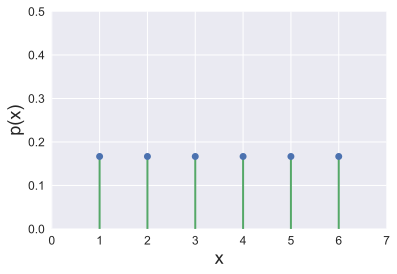

In [2]:
# extract two colors scheme from 
c1=list(plt.rcParams['axes.prop_cycle'])[1]['color']
c2=list(plt.rcParams['axes.prop_cycle'])[0]['color']

xi = np.array([1., 2., 3., 4., 5., 6.])
ui = 1./6
for pt in xi:
    plt.plot([pt, pt],[0., ui],'-', color=c1)
    plt.plot(pt, ui,'o', color=c2)
plt.xlabel('x', fontsize=18)
plt.ylabel('p(x)', fontsize=18)
plt.xlim(0,7)
plt.ylim(0,0.5)
    
#plt.savefig('disc.pdf')

Note that the sum $$\sum_{x=1}^{x=6} p(x) = 1.$$

This is a *normalized* discrete PDF.

As an example of a continuous PDF, consider the heights of American males or females. Perhaps it can be described by a *normal* distribution, which we will see later.

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(- \frac{(x-\mu)^2}{2 \sigma^2} \right), ~~~x \in (-\infty, \infty)$$

**Note** : actual data for men fits $\mu = 69.3$, and $\sigma = 3.0$ inches, while for women, $\mu = 64.0$ and $\sigma = 3.0$ inches.

*Interpretation*: The probability of the height lying between $x$ and $x+dx$ is given by $p(x) dx$.

Text(0,0.5,'p(x)')

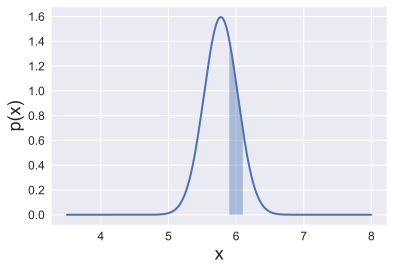

In [3]:
xi = np.linspace(3.5, 8,500)
mu = 69.3/12.0 # inches -> feet, for women 64 inches
sigma = 3.0/12.0 # inches
yi = mpl.mlab.normpdf(xi, mu, sigma)
plt.plot(xi,yi)

xi = np.linspace(5.9, 6.1, 10)
yi = mpl.mlab.normpdf(xi, mu, sigma)
plt.fill_between(xi, 0, yi, facecolor=c2, alpha=0.4)

#plt.xlim(4,8)  # set up the plot limits
plt.xlabel('x', fontsize=18)
plt.ylabel('p(x)', fontsize=18)
    
#plt.savefig('c.pdf')

The area of the shaded area represents the probability that the height of a randomly chosen individual from this population has a height between 5.9 to 6.1 feet.

The normalization condition on continuous PDFs is

$$\int_{-\infty}^{\infty} p(x) dx = 1.$$

In other words, the area under the curve is one.

The corresponding *normalization* condition for discrete PDFs is
$$\sum_{x = -\infty}^{\infty} p(x) dx = 1.$$

The *cumulative distribution function* or CDF $F(x)$ represents the probability that the random variable $X \leq x$.

For a discrete PDF, $p(x)$,

$$F(x) = \sum_{X=-\infty}^{x} p(X)$$

For the roll of a die:
$$
F(x) = \begin{cases}
        0, \quad \quad x < 1 \\
        x/6, \quad  1 \leq x \leq 6 \\
        1, \quad \quad x > 6
       \end{cases}
$$

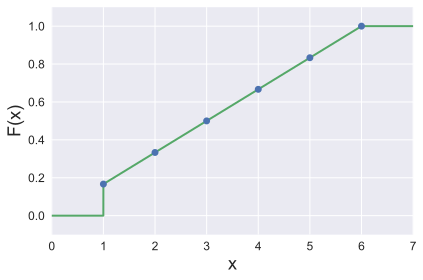

In [4]:
xi = np.array([0, 0.999, 1., 2., 3., 4., 5., 6., 7])
ui = 1./6. * xi
ui[0] = 0.
ui[1] = 0.
ui[-1] = 1.

plt.plot(xi,ui, '-', color=c1)
plt.plot(xi[2:-1],ui[2:-1], 'o', color=c2)

plt.xlabel('x', fontsize=18)
plt.ylabel('F(x)', fontsize=18)
plt.xlim(0,7)
plt.ylim(-0.1,1.1)
plt.tight_layout()
#plt.savefig('d.pdf')

For a continuous PDF,

$$F(x) = \int_{X=-\infty}^{x} p(X) dX$$

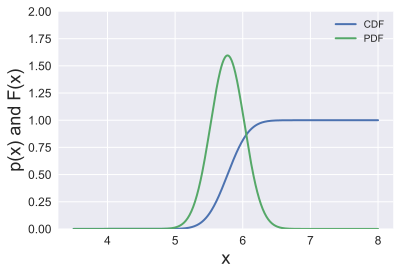

In [5]:
from scipy import integrate

xi = np.linspace(3.5, 8,500)
mu = 69.3/12.0 
sigma = 3.0/12.0 
yi = integrate.cumtrapz(mpl.mlab.normpdf(xi, mu, sigma), xi, initial=0.)
plt.plot(xi,yi,label='CDF')
plt.plot(xi, mpl.mlab.normpdf(xi, mu, sigma), label='PDF')
plt.ylim(0.0, 2.0)
plt.xlabel('x', fontsize=18)
plt.ylabel('p(x) and F(x)', fontsize=18)
plt.legend()

We can get the PDF from the CDF:

Discrete distributions
$$p(x) = F(x) - F(x-1)$$

Continuous distributions
$$p(x) = \frac{dF(x)}{dx}$$

## Pseudorandom Numbers

We will first discuss the generation of pseudo-random numbers $x \in [0, 1]$ from the uniform distribution. Once we have these, we can sample pretty much any distribution we care for.

Uniform Random Number Generators: generate a random number $x$ uniformly distributed between 0 and 1. 

$$u(x) = \begin{cases} 1, \quad \quad 0 \leq x < 1 \\ 0, \quad \quad \text{elsewhere} \end{cases}$$

(-0.1, 1.1)

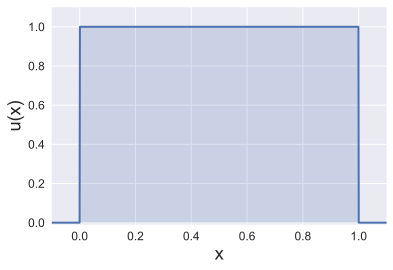

In [6]:
xi = np.linspace(-0.1,1.1,1000)
ui = np.ones(len(xi))
ui[xi < 0] = 0.
ui[xi > 1.] = 0.

plt.plot(xi,ui)
plt.fill_between(xi, 0, ui, facecolor=c2, alpha=0.2)

plt.xlabel('x', fontsize='18')
plt.ylabel('u(x)', fontsize='18')
plt.ylim(-0.01,1.1)
plt.xlim(-0.1, 1.1)
# plt.savefig('c.pdf')

The idea is to "toss a coin" for a (say) 32-bit binary number, so that each of the $2^{32}$ possibilities

$$
\begin{gather}
0000 \dots 000 \\
0000 \dots 001 \\
0000 \dots 010 \\
0000 \dots 011 \\
\vdots \\
1111 \dots 111
\end{gather}
$$

is visited in an "apparently" random fashion.

Usually the random numbers are based on a deterministic algorithm and hence called "pseudo"-random.

### Linear Congruential Generators

The simplest RNGs are linear congruential sequence RNGs.

They involve multiplication and truncation of leading bits of a number.

$$n_{i+1} = (a n_i) \mod m,$$

where $n_i$ is an integer, $a$ is the multiplier, and $m$ is the modulus.

$x \mod y$ is the modulo operator, e.g., $8\mod3  = 2,\, 5 \mod 5 = 0$.

$n_0$, the initial seed has to be supplied. Thus, a particular choice of $a$ and $m$ specify a particular method.

To get a real number between 0 and 1, compute $n_i/m$, which is guaranteed to be less than 1.

In [7]:
def LinCongGen(a, m, n0, num):
    # returns "num" integers "n"
    n = np.zeros(num, dtype=np.int)
    n[0] = n0
    
    for i in range(1,num):
        n[i] = a * n[i-1] % m # % = modulo operator in python
        
    return n

Not all choices of $a$ and $m$ result in a good RNG. For an example of a bad choice, consider $a=3, m=7$.

In [8]:
print (LinCongGen(3, 7, 12, 50))

[12  1  3  2  6  4  5  1  3  2  6  4  5  1  3  2  6  4  5  1  3  2  6  4  5
  1  3  2  6  4  5  1  3  2  6  4  5  1  3  2  6  4  5  1  3  2  6  4  5  1]


Notice that the sequence 1, 3, 2, 6, 4, 5 is periodic. Let us try a different seed $n_0$.

In [9]:
print (LinCongGen(3, 7, 8, 50))

[8 3 2 6 4 5 1 3 2 6 4 5 1 3 2 6 4 5 1 3 2 6 4 5 1 3 2 6 4 5 1 3 2 6 4 5 1
 3 2 6 4 5 1 3 2 6 4 5 1 3]


No luck. In general, we should choose an $m$ that is very large - usually something close to the maximum number on the computer to delay the periodic behavior as much as possible.

Consider a better choice: $a = 16807$ and $m = 2147483647$.

Text(0,0.5,'p(x)')

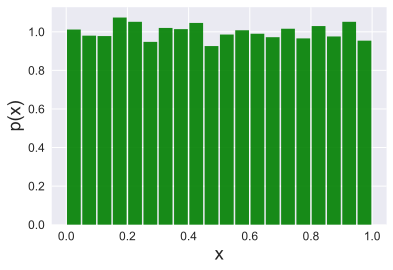

In [10]:
a = 16807
m = 2147483647
x = LinCongGen(a, m, 12, 10000).astype(float)/m
plt.hist(x, 20, normed=1, facecolor='green', alpha=0.9, rwidth=.9)
plt.xlabel('x', fontsize='18')
plt.ylabel('p(x)', fontsize='18')

Flat histograms, while a useful diagnostic measure, is not sufficient.

A famous disastrous bad choice is the RANDU RNG, which used $a=65539$ and $m = 2^{31}$. The histogram looks flat enough ...

Text(0,0.5,'p(x)')

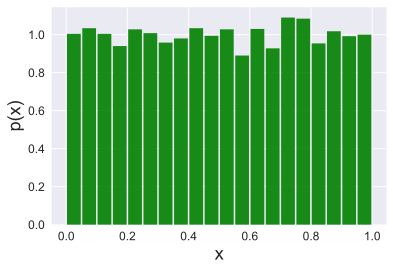

In [11]:
a = 65539
m = 2**31
x = LinCongGen(a, m, 12, 9999).astype(float)/m
plt.hist(x, 20, normed=1, facecolor='green', alpha=0.9, rwidth=0.9)
plt.xlabel('x', fontsize='18')
plt.ylabel('p(x)', fontsize='18')

But if you plot three successive deviates in 3D you see a disturbing pattern, if you look at it from the right angle.

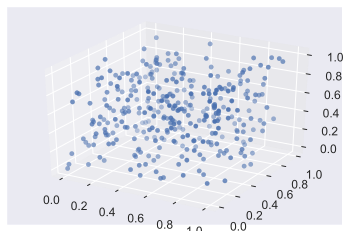

In [12]:
a = 65539
m = 2**31
x = LinCongGen(a, m, 12, 999).astype(float)/m

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0::3], x[1::3], x[2::3],'.',color=c2)

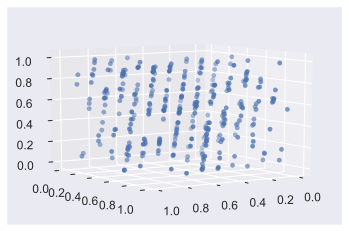

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(9, 57) # this adjusts the viewing angle
ax.scatter(x[0::3], x[1::3], x[2::3],'.', color=c2)
# plt.savefig('c.pdf')

### Sophisticated RNGs

What makes for a good RNG?

* meet statistical tests
    - What is the period of the algorithm?
    - Is histogram uniform?
    - Systematic correlation of deviates?
    - Florida State: Marsaglia, Diehard Battery of Tests for Randomness

Good RNGs include:

* Mersenne-Twister

* SIMD-oriented Fast Mersenne-Twister

* Well Equidistributed Long-period Linear (WELL)

* Xorshift

Most built-in RNGs probably belong to the second category. You should find out what a good RNG is for your favorite platform.

## Standard Distributions

Many libraries are available to generate random numbers from special standard families. If you can't find these for your system, do not fret. As long as you have a decent uniform random number generator, you can generate random numbers from any other distribution.

Let us catalog some standard distributions first by specifying the PDF, the CDF, and two other quantities.

* The **mean** or **expected value** of a random variable

Discrete distribution
$$E[x] = \sum_{x=-\infty}^{\infty} x p(x)$$

Continuous distribution
$$E[x] = \int_{-\infty}^{\infty} x p(x) dx$$

related is the expected value of a function $g(x)$ of the random variable. 

Discrete distribution
$$E[g] = \sum_{x=-\infty}^{\infty} g(x) p(x)$$

Continuous distribution
$$E[g] = \int_{-\infty}^{\infty} g(x) p(x) dx$$

* The **variance** of the random variable

$$V[x] = E[x^2] - E[x]^2.$$


### Discrete Distributions

Let us catalog some discrete distributions first

#### Uniform

Example: a roll of a die

More generally,

$$p(x) = \frac{1}{n},~~~ x \in \{a_1, a_2, .., a_n\}$$

where $a_i$ are the (exhaustive set of) different possible outcomes.

#### Binomial

Consider $N$ trials of an experiment with possible outcomes "success" or "failure" ("heads" or "tails", 0 or 1 etc.)

Suppose the probability of "success" is $p$

The discrete random number $n$ is the number of successes

Probability of a particular outcome say 'ssffs' is

$p p (1-p) (1-p) p = p^3 (1-p)^2$

Suppose, the order of successes and failures is unimportant (ssffs $\leftrightarrow$ sssff $\leftrightarrow$ sfsfs $\leftrightarrow$ etc.). Then the number of ways to generate $n$ successes and $N-n$ failures is

$${}^{N}C_{n} = \dfrac{N!}{(N-n)!n!}$$

The binomial distribution of $n$ successes in $N$ trials, when $p$ is the probability of success is given by

$$f(n; N, p) = \dfrac{N!}{(N-n)!n!} p^n (1-p)^N$$

In [14]:
def binomialdist(N, p):
    from scipy.special import comb
    
    n = np.arange(0,N+1)
    f = np.zeros((n.shape))
    
    for i in np.arange(0,N+1):
        f[i] = comb(N, n[i]) * p**n[i] * (1-p)**(N-n[i])
    
    return n, f

Text(0.5,0,'n')

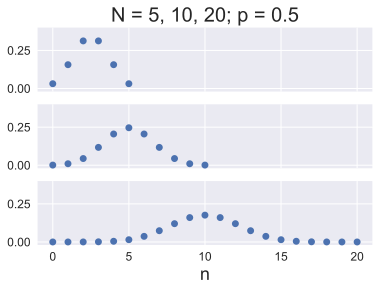

In [15]:
fig, axarr = plt.subplots(3, sharex=True)

N_list = [5, 10, 20]
for i, N in enumerate(N_list):
    n, f = binomialdist(N, 0.5)
    axarr[i].plot(n, f, 'o')
    
    start, end = axarr[i].get_xlim()
    axarr[i].xaxis.set_ticks(np.arange(0,end,5))
    axarr[i].set_ylim(-0.02, 0.4)
    
axarr[0].set_title('N = 5, 10, 20; p = 0.5', fontsize='20')
axarr[2].set_xlabel('n', fontsize='18')

Text(0.5,0,'n')

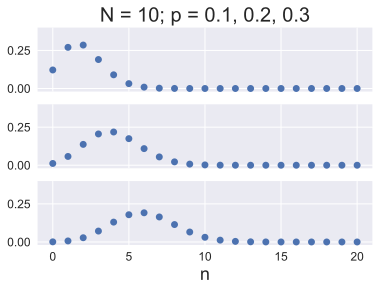

In [16]:
fig, axarr = plt.subplots(3, sharex=True)

p_list = [0.1, 0.2, 0.3]
for i, p in enumerate(p_list):
    n, f = binomialdist(20, p)
    axarr[i].plot(n, f, 'o')
    
    start, end = axarr[i].get_xlim()
    axarr[i].xaxis.set_ticks(np.arange(0,end,5))
    axarr[i].set_ylim(-0.02, 0.4)
    
axarr[0].set_title('N = 10; p = 0.1, 0.2, 0.3', fontsize='20')
axarr[2].set_xlabel('n', fontsize='18')

For the binomial distribution $E[x] = Np$ and $V[x] = Np(1-p)$.

#### Poisson Distribution

Wikipedia has a succinct description: 

    The Poisson distribution expresses the probability of a given 
    number of events occurring in a fixed interval of time and/or 
    space if these events occur with a known average rate and 
    independently of the time since the last event.

For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. If receiving any particular piece of mail doesn't affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then a reasonable assumption is that the number of pieces of mail received per day obeys a Poisson distribution. 

Other examples that may follow a Poisson: the number of 
* phone calls received by a call center per hour
* decay events per second from a radioactive source
* taxis passing a particular street corner per hour.

The probability of observing $k$ events in an interval where the average rate is $\lambda$ is given by:

$$f(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, ~~~ k = 0, 1, ..., \infty$$

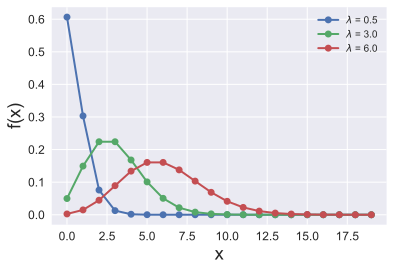

In [17]:
def PoissonDist(lam, kvec):
    from math import factorial, exp
    
    fvec = np.zeros(kvec.shape)
    i    = 0
    for k in kvec:
        fvec[i] = lam**k * exp(-lam)/factorial(k)
        i = i + 1
        
    return fvec

kvec = np.arange(0,20)
f0 = PoissonDist(0.5, kvec)
f1 = PoissonDist(3.0, kvec)
f2 = PoissonDist(6.0, kvec)
plt.plot(kvec,f0, 'o-',label='$\lambda$ = 0.5')
plt.plot(kvec,f1, 'o-',label='$\lambda$ = 3.0')
plt.plot(kvec,f2, 'o-',label='$\lambda$ = 6.0')

plt.xlabel('x', fontsize='18')
plt.ylabel('f(x)', fontsize='18')
plt.legend()
#plt.grid()


The mean and variance of the Poisson distribution are both equal to $\lambda$.

### Continuous Distributions

#### Uniform

A general continuous uniform distribution function has the form:

$$f(x) = \begin{cases} \frac{1}{b-a} & \text{ for } a \leq x \leq b \\ 0 & \text{ elsewhere}.\end{cases}$$

As a particular example consider $a = -1$, and $b = 1$.

The PDF then looks like the following:

(0, 0.6)

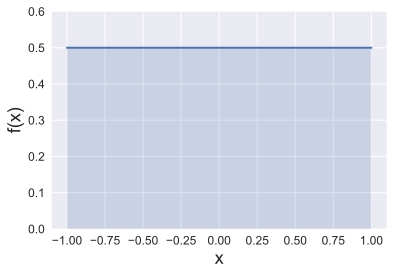

In [18]:
a, b = -1.0, 1.0
x = np.linspace(a, b)
f = 1./(b-a) * np.ones(x.shape)
plt.plot(x,f)
plt.xlabel('x', fontsize='18')
plt.ylabel('f(x)', fontsize='18')
plt.fill_between(x, 0, f, facecolor=c2, alpha=0.2)
plt.xlim(-1.1,1.1)
plt.ylim(0,0.6)


The mean $E[x] = (a+b)/2$.

Exercise: Calculate the variance $V[x]$ by computing the integral

$$E[x^2] = \int_{a}^{b} x^2 f(x) dx$$

#### Gaussian or Normal Distribution

We have seen the Gaussian distribution before:

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left( -\frac{(x-\mu)^2}{2 \sigma^2} \right), ~~~x \in (-\infty, \infty)$$

The variance is $\sigma^2$ and the mean is $\mu$.

Text(0,0.5,'p(x)')

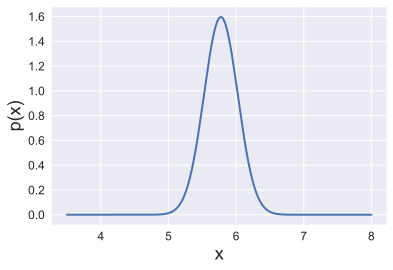

In [19]:
xi = np.linspace(3.5, 8,500)
mu = 69.3/12.0 
sigma = 3.0/12.0 
yi = mpl.mlab.normpdf(xi, mu, sigma)
plt.plot(xi,yi)

plt.xlabel('x', fontsize=18)
plt.ylabel('p(x)', fontsize=18)

#### Exponential Distribution

The exponential distribution is closely related to the Poisson distribution. ([Explanation](https://www.statlect.com/probability-distributions/Poisson-distribution))

It describes the time between events in a Poisson process, i.e. a process in which events occur continuously and independently at a constant average rate.


$$f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$$

For the three Poisson distributions considered previously:

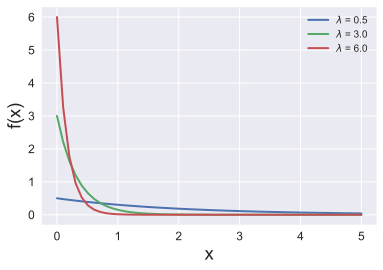

In [20]:
x = np.linspace(0,5)

lam_list = [0.5, 3.0, 6.0]
for lam in lam_list:
    f0 = lam*np.exp(-lam*x)
    plt.plot(x, f0, label='$\lambda$ = ' + str(lam))

plt.xlabel('x', fontsize='18')
plt.ylabel('f(x)', fontsize='18')
plt.legend()

The mean and the variance of the Poisson distribution are $1/\lambda$ and $1/\lambda^2$ respectively.

## SciPy Distributions

Consider the [lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution):

$$\frac 1 {x\sigma\sqrt{2\pi}}\ e^{-\frac{\left(\ln x-\mu\right)^2}{2\sigma^2}}$$

Some initial setup to make sure distributions are described similarly

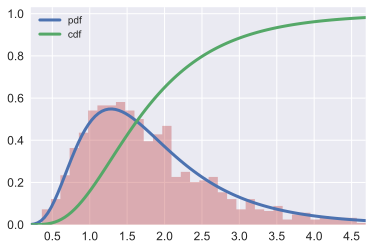

In [21]:
from scipy.stats import lognorm

# standard distribution specfiers
sigma = 0.5
mu    = 0.5

# SciPy translation (from documentation)
s     = sigma
loc   = 0.
scale = np.exp(mu)

# ppf = inverse of cdf
# finds relevant range over which PDF is nonzero
x = np.linspace(lognorm.ppf(0.001, s), 
                lognorm.ppf(0.999, s), 100) 
plt.xlim(min(x), max(x))

# plot CDF and PDF
plt.plot(x, lognorm.pdf(x, s, loc, scale), lw=3, label='pdf')
plt.plot(x, lognorm.cdf(x, s, loc, scale), lw=3, label='cdf')

# sample from distribution
r = lognorm.rvs(s, loc, scale, size=1000)
plt.hist(r, 50, normed=True, histtype='stepfilled', alpha=0.4)
plt.legend(loc='upper left')
plt.savefig('scipy.pdf')